# Exercises for Lecture 13 (Training deep neural networks)

In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Exercise 1: Build a deep neural network with ELU activation functions and batch normalisation and apply it to fashion MINST.

How good of an accuracy can you achieve on the test set?

In [2]:
import tensorflow as tf
from tensorflow import keras
from functools import partial

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

2022-02-14 21:47:51.772298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-14 21:47:51.772341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

2022-02-14 21:47:54.202710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-14 21:47:54.202742: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-14 21:47:54.202765: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az75-959): /proc/driver/nvidia/version does not exist
2022-02-14 21:47:54.203028: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 100)               1

In [5]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 1.1730 - accuracy: 0.6158 - val_loss: 0.6026 - val_accuracy: 0.7980
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7474 - accuracy: 0.7482 - val_loss: 0.5104 - val_accuracy: 0.8264
Epoch 3/10
1719/1719 [==============================] - 9s 6ms/step - loss: 0.6680 - accuracy: 0.7719 - val_loss: 0.4652 - val_accuracy: 0.8390
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6218 - accuracy: 0.7845 - val_loss: 0.4390 - val_accuracy: 0.8440
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5884 - accuracy: 0.7963 - val_loss: 0.4237 - val_accuracy: 0.8476
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5747 - accuracy: 0.8024 - val_loss: 0.4125 - val_accuracy: 0.8514
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5443 - accuracy: 0.8118 - val_loss: 0.3997 - val_accurac

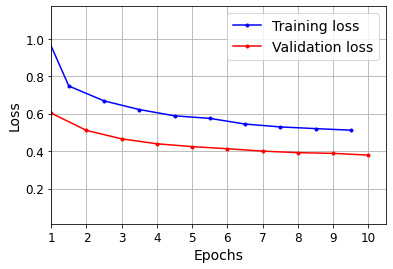

In [6]:
def plot_learning_curves(loss, val_loss):
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.axis([1, len(loss)+0.5, min(loss)-0.5, max(loss)])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4224 - accuracy: 0.8489


[0.42236265540122986, 0.8489000201225281]